# Phosphogypsum Rare Earth Element Recovery System (PREERS): leaching demo

# Import Packages
Packages contain predefined frameworks/tools for creating the simulation

In [1]:
import qsdsan as qs
import os, sys, pickle, pandas as pd, qsdsan as qs, brightway2 as bw
from scipy import interpolate
import numpy as np
from chaospy import distributions 
import matplotlib.pyplot as plt
import brightway2 as bw
import collections.abc
import eidl as eidl
#hyper needs the four following aliases to be done manually.
collections.Iterable = collections.abc.Iterable
collections.Mapping = collections.abc.Mapping
collections.MutableSet = collections.abc.MutableSet
collections.MutableMapping = collections.abc.MutableMapping

In [2]:
bw.projects.set_current('REEPSv1')

bw.bw2setup()
eidl.get_ecoinvent()
# username: Shi_Research_Group
# password: ShiGroup!

Biosphere database already present!!! No setup is needed


logging in to ecoinvent homepage...
login successful!

 available versions:
a 3.9.1
b 3.9
c 3.8
d 3.7.1
e 3.7
f 3.6
g 3.5
h 3.4
i 3.3
j 3.2
k 3.10
l 3.1
m 3.01

 system models:
a apos
b consequential
c cutoff
downloading cutoff 3.9.1 ...
download finished!: C:\Users\adsme\AppData\Local\EcoInventDownLoader\EcoInventDownLoader\cutoff391.7z

Extracting XML data from 21238 datasets
Extracted 21238 datasets in 35.57 seconds
Applying strategy: normalize_units
Applying strategy: update_ecoinvent_locations
Applying strategy: remove_zero_amount_coproducts
Applying strategy: remove_zero_amount_inputs_with_no_activity
Applying strategy: remove_unnamed_parameters
Applying strategy: es2_assign_only_product_with_amount_as_reference_product
Applying strategy: assign_single_product_as_activity
Applying strategy: create_composite_code
Applying strategy: drop_unspecified_subcategories
Applying strategy: fix_ecoinvent_flows_pre35
Applying strategy: drop_temporary_outdated_biosphere_flows
Applying strateg

Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:01:09


Title: Writing activities to SQLite3 database:
  Started: 01/26/2024 12:19:20
  Finished: 01/26/2024 12:20:30
  Total time elapsed: 00:01:09
  CPU %: 5.00
  Memory %: 23.74
Created database: cutoff391


In [23]:
print(bw.databases)
bsdb = bw.Database('biosphere3') # biosphere database for ecoinvent 3.9.1
eidb = bw.Database('cutoff391')
print("The imported ecoinvent database is of type {} and has a length of {}.".format(type(bsdb), len(bsdb)))
print("The imported ecoinvent database is of type {} and has a length of {}.".format(type(eidb), len(eidb)))


Databases dictionary with 2 object(s):
	biosphere3
	cutoff391
The imported ecoinvent database is of type <class 'bw2data.backends.peewee.database.SQLiteBackend'> and has a length of 4709.
The imported ecoinvent database is of type <class 'bw2data.backends.peewee.database.SQLiteBackend'> and has a length of 21242.


In [6]:
[i for i in eidb if 'PG Stack Tsioka' in i['name']]

['PG Stack Tsioka' (t, GLO, None)]

In [24]:
[i for i in eidb if 'market for sulfuric acid' in i['name'] and 'RoW' in i['location']]

['market for sulfuric acid' (kilogram, RoW, None)]

In [26]:
[m for m in bw.methods if 'AWARE' in str(m) ] # ReCiPe 2016 v1.03

[]

In [29]:
[m for m in bw.methods if 'ReCiPe' in str(m) and 'midpoint' in str(m) and '(H)' in str(m) and not 'no LT' in str(m)] # ReCiPe 2016 v1.03

[('ReCiPe 2016 v1.03, midpoint (H)',
  'acidification: terrestrial',
  'terrestrial acidification potential (TAP)'),
 ('ReCiPe 2016 v1.03, midpoint (H)',
  'climate change',
  'global warming potential (GWP1000)'),
 ('ReCiPe 2016 v1.03, midpoint (H)',
  'ecotoxicity: freshwater',
  'freshwater ecotoxicity potential (FETP)'),
 ('ReCiPe 2016 v1.03, midpoint (H)',
  'ecotoxicity: marine',
  'marine ecotoxicity potential (METP)'),
 ('ReCiPe 2016 v1.03, midpoint (H)',
  'ecotoxicity: terrestrial',
  'terrestrial ecotoxicity potential (TETP)'),
 ('ReCiPe 2016 v1.03, midpoint (H)',
  'energy resources: non-renewable, fossil',
  'fossil fuel potential (FFP)'),
 ('ReCiPe 2016 v1.03, midpoint (H)',
  'eutrophication: freshwater',
  'freshwater eutrophication potential (FEP)'),
 ('ReCiPe 2016 v1.03, midpoint (H)',
  'eutrophication: marine',
  'marine eutrophication potential (MEP)'),
 ('ReCiPe 2016 v1.03, midpoint (H)',
  'human toxicity: carcinogenic',
  'human toxicity potential (HTPc)'),
 ('R

In [2]:
[m for m in bw.methods if 'ReCiPe Midpoint (H) V1.13' in str(m) and not 'LT' in str(m)]

[('ReCiPe Midpoint (H) V1.13', 'agricultural land occupation', 'ALOP'),
 ('ReCiPe Midpoint (H) V1.13', 'ozone depletion', 'ODPinf'),
 ('ReCiPe Midpoint (H) V1.13', 'climate change', 'GWP100'),
 ('ReCiPe Midpoint (H) V1.13', 'terrestrial acidification', 'TAP100'),
 ('ReCiPe Midpoint (H) V1.13', 'photochemical oxidant formation', 'POFP'),
 ('ReCiPe Midpoint (H) V1.13', 'metal depletion', 'MDP'),
 ('ReCiPe Midpoint (H) V1.13', 'water depletion', 'WDP'),
 ('ReCiPe Midpoint (H) V1.13', 'freshwater ecotoxicity', 'FETPinf'),
 ('ReCiPe Midpoint (H) V1.13', 'human toxicity', 'HTPinf'),
 ('ReCiPe Midpoint (H) V1.13', 'urban land occupation', 'ULOP'),
 ('ReCiPe Midpoint (H) V1.13', 'particulate matter formation', 'PMFP'),
 ('ReCiPe Midpoint (H) V1.13', 'freshwater eutrophication', 'FEP'),
 ('ReCiPe Midpoint (H) V1.13', 'marine eutrophication', 'MEP'),
 ('ReCiPe Midpoint (H) V1.13', 'terrestrial ecotoxicity', 'TETPinf'),
 ('ReCiPe Midpoint (H) V1.13', 'fossil depletion', 'FDP'),
 ('ReCiPe Midpoint

In [22]:
eidb = bw.Database('cutoff38')
bsdb = bw.Database('biosphere3')
# [i for i in eidb if 'market for neodymium' in i['name'] and 'GLO' in i['location']][0].as_dict()
[i for i in bsdb if 'Water' in i['name'] and 'water' in i['categories'] and 'surface water' in i['categories'] and 'emission' in i['type']][0].as_dict()

# [i for i in bsdb if 'Carbon monoxide, fossil' in i['name'] and 'low population density, long-term' in i['categories']][0]

{'categories': ('water', 'surface water'),
 'code': 'db4566b1-bd88-427d-92da-2d25879063b9',
 'CAS number': '007732-18-5',
 'name': 'Water',
 'database': 'biosphere3',
 'unit': 'cubic meter',
 'type': 'emission'}

In [16]:
[i for i in eidb if 'market for wastewater, average' in i['name'] and 'RoW' in i['location']][0].as_dict()

{'comment': "Transport from producers to consumers of this product in the geography covered by the market is included.\nThis is a market activity, representing a treatment mix. In the case of products needing treatment, market mixes are supplied by the activities treating the product in the geography defined by the market, and they supply the activities needing to treat the product, as they have generated it as a by-product in the Undefined processes (present as a negative input in system models). Transport to the treating facility or losses are also accounted in this type of markets, when relevant.\nThis is the market for  'wastewater, average', in the Global geography.",
 'classifications': [('EcoSpold01Categories',
   'waste management/wastewater treatment'),
  ('ISIC rev.4 ecoinvent', '3700:Sewerage'),
  ('CPC', '39920: Sewage sludge')],
 'activity type': 'market activity',
 'activity': '6e5aa015-da83-46eb-b89b-f3ca4d9253bc',
 'database': 'cutoff38',
 'filename': '6e5aa015-da83-46e

# Compile Components
Obtain physical properties for streams

In [4]:
#  Setup inlet flows
Calcium_sulfate_dihydrate = qs.Chemical(ID='Calcium_sulfate_dihydrate', 
CAS=10101-41-4, 
search_db=True, 
phase='s', 
rho=2320, #         https://pubchem.ncbi.nlm.nih.gov/compound/24928
Cp=186.2/172.171, #           http://chemister.ru/Database/properties-en.php?dbid=1&id=552
Hf=-2021.1*1000) #          http://chemister.ru/Database/properties-en.php?dbid=1&id=552

cmps_default = qs.Components.load_default()
Neodymium = qs.Component('Nd', search_ID='7440-00-8', particle_size = 'Soluble', degradability='Undegradable', organic=False)
Gypsum = qs.Component.from_chemical('Gypsum', chemical=Calcium_sulfate_dihydrate, particle_size = 'Particulate', degradability='Undegradable', organic=False)
H2SO4 = qs.Component('H2SO4', search_ID='7664-93-9', particle_size = 'Soluble', degradability='Undegradable', organic=False)
HNO3 = qs.Component('HNO3', search_ID='7697-37-2', particle_size = 'Soluble', degradability='Undegradable', organic=False)
cmps = qs.Components([*cmps_default, Neodymium, Gypsum, H2SO4, HNO3])
qs.set_thermo(cmps)
cmps



CompiledComponents([S_H2, S_CH4, S_CH3OH, S_Ac, S_Prop, S_F, S_U_Inf, S_U_E, C_B_Subst, C_B_BAP, C_B_UAP, C_U_Inf, X_B_Subst, X_OHO_PHA, X_GAO_PHA, X_PAO_PHA, X_GAO_Gly, X_PAO_Gly, X_OHO, X_AOO, X_NOO, X_AMO, X_PAO, X_MEOLO, X_FO, X_ACO, X_HMO, X_PRO, X_U_Inf, X_U_OHO_E, X_U_PAO_E, X_Ig_ISS, X_MgCO3, X_CaCO3, X_MAP, X_HAP, X_HDP, X_FePO4, X_AlPO4, X_AlOH, X_FeOH, X_PAO_PP_Lo, X_PAO_PP_Hi, S_NH4, S_NO2, S_NO3, S_PO4, S_K, S_Ca, S_Mg, S_CO3, S_N2, S_O2, S_CAT, S_AN, H2O, Nd, Gypsum, H2SO4, HNO3])


# Gather LCA Emission Factors
Emission factors are the total environmental impact of an activity. This impact can be linked to process streams to calculate total impact of a stream

### Import the EcoInvent LCI Database and set directory to store data

In [19]:
# Commented code accesses the EcoInvent website and downloads the requested database to be used in Python
# import eidl 
# eidl.get_ecoinvent() # ei cutoff 3.8

# Set the directory to store the LCA data
c_path = os.path.abspath(r'C:\Users\ajs8911\OneDrive - The Pennsylvania State University\Research\System Analysis\Python Scripts\PG_REE_base\PG_REE')
data_path = os.path.join(c_path, 'data_scratch')

### Gather the LCIA indicators desired

In [68]:
def create_indicators(replace=True):
    from bw2qsd import CFgetter
    from bw2qsd.utils import format_name
    cutoff38 = CFgetter('cutoff38')
    biosphere = CFgetter('biosphere3')
    # ecoinvent version 3.8, cutoff
    cutoff38.load_database('cutoff38')

    # Only include categorical total (not including total of categories)
    cutoff38.load_indicators(add=True,
                            method='recipe endpoint', method_exclude='LT',
                            category_exclude='total', indicator='total')
    # Include TRACI model
    cutoff38.load_indicators(add=True, method='TRACI', indicator='global warming')

    ind_df_raw = cutoff38.export_indicators(show=False, path='')
    ind_df_processed = ind_df_raw.copy()

    for num, ind in ind_df_raw.iterrows():
        old_name = ind['indicator']
        if 'TRACI' in ind['method']:
            new_name = old_name
        else:
            kind = ind['method'].split(',A)')[0][-1] # egalitarian, hierarchist, individualist
            new_name = f'{kind}_{format_name(ind["category"])}_Total' # categorical total
        ind_df_processed.iloc[num]['indicator'] = new_name

    ind_df_processed.sort_values(by=['method', 'category', 'indicator'], inplace=True)

    if replace:
        for ind_ID in ind_df_processed.indicator:
            ind = qs.ImpactIndicator.get_indicator(ind_ID)
            if ind:
                #stdout = sys.stdout
                #sys.stdout = open(os.devnull, 'w')
                ind.deregister()
                #sys.stdout = stdout

    qs.ImpactIndicator.load_from_file(ind_df_processed)
    indicators = qs.ImpactIndicator.get_all_indicators()

    return cutoff38, ind_df_processed, indicators

In [7]:
from bw2qsd import CFgetter
from bw2qsd.utils import format_name
cutoff38 = CFgetter('cutoff38')
biosphere = CFgetter('biosphere3')
# ecoinvent version 3.8, cutoff
cutoff38.load_database('cutoff38')

# Only include categorical total (not including total of categories)
cutoff38.load_indicators(add=True,
                        method='recipe endpoint', method_exclude='LT',
                        category_exclude='total', indicator='total')
# Include TRACI model
cutoff38.load_indicators(add=True, method='TRACI', indicator='global warming')

ind_df_raw = cutoff38.export_indicators(show=False, path='')
ind_df_processed = ind_df_raw.copy()

for num, ind in ind_df_raw.iterrows():
    old_name = ind['indicator']
    if 'TRACI' in ind['method']:
        new_name = old_name
    else:
        kind = ind['method'].split(',A)')[0][-1] # egalitarian, hierarchist, individualist
        new_name = f'{kind}_{format_name(ind["category"])}_Total' # categorical total
    ind_df_processed.iloc[num]['indicator'] = new_name

ind_df_processed

Database Brightway2 SQLiteBackend: cutoff38 with 19568 inventories has been loaded.

9 indicator loaded/updated for cutoff38.

1 indicators loaded/updated for cutoff38.


,indicator,alias,unit,method,category,description,full_name
0,I_HumanHealth_Total,,points,"ReCiPe Endpoint (I,A)",human health,,"(ReCiPe Endpoint (I,A), human h..."
1,H_HumanHealth_Total,,points,"ReCiPe Endpoint (H,A)",human health,,"(ReCiPe Endpoint (H,A), human h..."
2,GlobalWarming,,kg CO2-Eq,TRACI,environmental impact,,"(TRACI, environmental impact, g..."
3,H_Resources_Total,,points,"ReCiPe Endpoint (H,A)",resources,,"(ReCiPe Endpoint (H,A), resourc..."
4,I_EcosystemQuality_Total,,points,"ReCiPe Endpoint (I,A)",ecosystem quality,,"(ReCiPe Endpoint (I,A), ecosyst..."
5,E_EcosystemQuality_Total,,points,"ReCiPe Endpoint (E,A)",ecosystem quality,,"(ReCiPe Endpoint (E,A), ecosyst..."
6,I_Resources_Total,,points,"ReCiPe Endpoint (I,A)",resources,,"(ReCiPe Endpoint (I,A), resourc..."
7,E_HumanHealth_Total,,points,"ReCiPe Endpoint (E,A)",human health,,"(ReCiPe Endpoint (E,A), human h..."
8,H_EcosystemQuality_Total,,points,"ReCiPe Endpoint (H,A)",ecosystem quality,,"(ReCiPe Endpoint (H,A), ecosyst..."
9,E_Resources_Total,,points,"ReCiPe Endpoint (E,A)",resources,,"(ReCiPe Endpoint (E,A), resourc..."


In [8]:
from bw2qsd import CFgetter
from bw2qsd.utils import format_name
cutoff38 = CFgetter('cutoff38')
biosphere = CFgetter('biosphere3')
# ecoinvent version 3.8, cutoff
cutoff38.load_database('cutoff38')

cutoff38.load_indicators(add=True, method='eco-indicator', method_exclude=('LT','E,E','I,I'), category_exclude='total', indicator='climate change')

# Include TRACI model
# cutoff38.load_indicators(add=True, method='TRACI')

# Include ReCiPe v1.13 (Hierarchist) LCIA method 
cutoff38.load_indicators(add=True, method='ReCiPe Midpoint (H) V1.13', method_exclude=('LT'))

ind_df_raw = cutoff38.export_indicators(show=False, path='')
ind_df_processed = ind_df_raw.copy()

for num, ind in ind_df_raw.iterrows():
    old_name = ind['indicator']
    if 'ReCiPe' in ind['method']:
        new_name = old_name
    else:
        kind = ind['method'].split(') (')[0][-1] # egalitarian, hierarchist, individualist
        new_name = f'{kind}_{format_name(ind["indicator"])}'.translate({ord('&'):'And'}) # categorical total
    ind_df_processed.iloc[num]['indicator'] = new_name

ind_df_processed.sort_values(by=['method', 'category', 'indicator'], inplace=True)

Database Brightway2 SQLiteBackend: cutoff38 with 19568 inventories has been loaded.

1 indicators loaded/updated for cutoff38.

18 indicator loaded/updated for cutoff38.


In [9]:
ind_df_processed

,indicator,alias,unit,method,category,description,full_name
13,ALOP,,square meter-year,ReCiPe Midpoint (H) V1.13,agricultural land occupation,,"(ReCiPe Midpoint (H) V1.13, agr..."
12,GWP100,,kg CO2-Eq,ReCiPe Midpoint (H) V1.13,climate change,,"(ReCiPe Midpoint (H) V1.13, cli..."
4,FDP,,kg oil-Eq,ReCiPe Midpoint (H) V1.13,fossil depletion,,"(ReCiPe Midpoint (H) V1.13, fos..."
2,FETPinf,,"kg 1,4-DCB-Eq",ReCiPe Midpoint (H) V1.13,freshwater ecotoxicity,,"(ReCiPe Midpoint (H) V1.13, fre..."
9,FEP,,kg P-Eq,ReCiPe Midpoint (H) V1.13,freshwater eutrophication,,"(ReCiPe Midpoint (H) V1.13, fre..."
18,HTPinf,,"kg 1,4-DCB-Eq",ReCiPe Midpoint (H) V1.13,human toxicity,,"(ReCiPe Midpoint (H) V1.13, hum..."
17,IRP_HE,,kg U235-Eq,ReCiPe Midpoint (H) V1.13,ionising radiation,,"(ReCiPe Midpoint (H) V1.13, ion..."
6,METPinf,,"kg 1,4-DB-Eq",ReCiPe Midpoint (H) V1.13,marine ecotoxicity,,"(ReCiPe Midpoint (H) V1.13, mar..."
3,MEP,,kg N-Eq,ReCiPe Midpoint (H) V1.13,marine eutrophication,,"(ReCiPe Midpoint (H) V1.13, mar..."
16,MDP,,kg Fe-Eq,ReCiPe Midpoint (H) V1.13,metal depletion,,"(ReCiPe Midpoint (H) V1.13, met..."


In [ ]:
# use to remove indicators
# cutoff38.remove(kind='indicator', keys=cutoff38.export_indicators(show=False, path='')['full_name'])

In [12]:
def create_indicators(replace=True):
    from bw2qsd import CFgetter
    from bw2qsd.utils import format_name
    cutoff38 = CFgetter('cutoff38')
    # ecoinvent version 3.8, cutoff
    cutoff38.load_database('cutoff38')

    # Only include categorical total (not including total of categories)
    cutoff38.load_indicators(add=True, method='eco-indicator', method_exclude=('LT','E,E','I,I'), category_exclude='total', indicator='climate change')
    # Include TRACI model
    cutoff38.load_indicators(add=True, method='TRACI')

    ind_df_raw = cutoff38.export_indicators(show=False, path='')
    ind_df_processed = ind_df_raw.copy()

    for num, ind in ind_df_raw.iterrows():
        old_name = ind['indicator']
        if 'TRACI' in ind['method']:
            new_name = old_name
        else:
            kind = ind['method'].split(',A)')[0][-1] # egalitarian, hierarchist, individualist
            new_name = f'{kind}_{format_name(ind["category"])}_Total' # categorical total
        ind_df_processed.iloc[num]['indicator'] = new_name

    ind_df_processed.sort_values(by=['method', 'category', 'indicator'], inplace=True)

    if replace:
        for ind_ID in ind_df_processed.indicator:
            ind = qs.ImpactIndicator.get_indicator(ind_ID)
            if ind:
                #stdout = sys.stdout
                #sys.stdout = open(os.devnull, 'w')
                ind.deregister()
                #sys.stdout = stdout

    qs.ImpactIndicator.load_from_file(ind_df_processed)
    indicators = qs.ImpactIndicator.get_all_indicators()

    return cutoff38, ind_df_processed, indicators

### How to get "emission" factors for elementary (biosphere) flows

In [10]:
# In order to use Biosphere3 database flows, they must be added to the Ecoinvent database via the creation of a new activity with one exchange (the bsdb flow of interest)
eidb = bw.Database('cutoff38')
CO2_emission = eidb.new_activity(code = 'One CO2 stream=1', name = "CO2_emission", unit = "kg")
CO2_emission.save()

CO2_fossil = [i for i in bsdb if 'Carbon dioxide, fossil' in i['name'] and 'low population density, long-term' in i['categories']][0]
CO2_emission.new_exchange(input=CO2_fossil.key,amount=1,type='biosphere').save()

[i for i in eidb if 'CO2_emission' in i['name']][0]

IntegrityError: UNIQUE constraint failed: activitydataset.database, activitydataset.code

In [13]:
# Loading activities to bw2qsd in "select_items()" is good after doing the above step. This is the guts of the emission factor calculation "organize_cfs()" (CFgetter from bw2qsd). 
from bw2qsd import CFgetter
import sys, os
from bw2qsd import remove_setups_pickle

cutoff38, ind_df_processed, indicators = create_indicators()
cutoff38.load_activities(string='CO2_emission', add=True, limit=10)
activities = cutoff38.activities
indicators = cutoff38.indicators
display(activities)

if not indicators:
    raise ValueError('No loaded indicators.')
elif not activities:
    raise ValueError('No loaded activities.')

if not set(indicators).issubset(indicators):
    raise ValueError('Provided indicator(s) not all loaded.')


inds = indicators if indicators else indicators
ind_units = [bw.methods.get(i)['unit'] for i in inds] + ['-', '-']
acts = [activities[k] for k in activities] if activities \
    else [v for v in activities.values()]
{'inv': [{a:1} for a in acts],'ia': inds}
bw.calculation_setups['multiLCA'] = {'inv': [{a:1} for a in acts],
                                        'ia': inds}
bw.calculation_setups['multiLCA'] 
# This is to prevent bw2 from printing in the console
stdout = sys.stdout
sys.stdout = open(os.devnull, 'w')
mlca = bw.MultiLCA('multiLCA')
sys.stdout = stdout

# pd_indices = [a['name'] for a in acts]
pd_cols = pd.MultiIndex.from_tuples(inds, names=('method', 'category', 'indicator'))
cf_df = pd.DataFrame(data=mlca.results, columns=pd_cols)
unit_df = pd.DataFrame(data={k: v for k, v in zip(cf_df.columns, ind_units)},
                        index=[-1,], dtype='object')
# cf_df = pd.DataFrame(data=mlca.results, index=pd_indices, columns=pd_cols)
cf_df[('-', '-', 'activity name')] = [a['name'] for a in acts]
cf_df[('-', '-', 'functional unit')] = [a['unit'] for a in acts]

df = pd.concat((unit_df, cf_df))
df.sort_index(axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

remove_setups_pickle()

display(df)



Database Brightway2 SQLiteBackend: cutoff38 with 19568 inventories has been loaded.

1 indicators loaded/updated for cutoff38.

9 indicator loaded/updated for cutoff38.
1 activity loaded/updated for cutoff38.



{'CO2_emission': 'CO2_emission' (kg, GLO, None)}

File "setups.pickle" successfully removed from directory "C:\Users\adsme\AppData\Local\pylca\Brightway3\default.c21f969b5f03d33d43e04f8f136e7682".


-                                TRACI               \
              -                 environmental impact                
  activity name functional unit        acidification  ecotoxicity   
0           NaN             NaN       moles of H+-Eq  kg 2,4-D-Eq   
1  CO2_emission              kg                    0            0   

                  ...                                         \
                  ...                           human health   
  eutrophication  ... photochemical oxidation  carcinogenics   
0           kg N  ...               kg NOx-Eq  kg benzene-Eq   
1              0  ...                       0              0   

                                                  \
                                                   
  non-carcinogenics respiratory effects, average   
0     kg toluene-Eq                  kg PM2.5-Eq   
1                 0                            0   

  eco-indicator 99, (H,A) (superseded)  
                          human health  
                        climate change  
0                              points   
1                             0.00545   

[2 rows x 12 columns]

In [26]:
# use to remove indicators
# cutoff38.remove(kind='indicator', keys=cutoff38.export_indicators(show=False, path='')['full_name'])

Successfully removed 47 indicators from cutoff38.



### Get activities from the Ecoinvent database and calculate emission factors

In [36]:
def select_items(database):
    all_acts = {}
    eidb = bw.Database('cutoff38')

    def new_act(database, all_acts, name):
        act = database.copy(name)
        all_acts[name] = act
        return act

    # Catch all printouts (i.e., don't show them in the console)
    # stdout = sys.stdout
    # sys.stdout = open(os.devnull, 'w')

    # Sulfuric Acid
    H2SO4_item = new_act(database, all_acts, 'H2SO4_item')
    H2SO4_item.load_activities('market for sulfuric acid', add=True, filter={'location': 'RoW'}, limit=None)
    to_remove = []
    for act in H2SO4_item.activities.keys():
        if ('bromine production' in act) or ('sodium chloride production, powder' in act):
            to_remove.append(act)
    H2SO4_item.remove('activity', to_remove)

    # Oxalic Acid
    OA_item = new_act(database, all_acts, 'OA_item')
    dct = [i for i in eidb if 'market for oxalic acid' in i['name'] and 'GLO' in i['location']][0]
    dct2 = {dct['name']: dct}
    OA_item._activities.update(dct2)

    # Process Water
    pwater_item = new_act(database, all_acts, 'pwater_item')
    dct = [i for i in eidb if 'market for water, decarbonised' in i['name'] and 'US' in i['location']][0]
    dct2 = {dct['name']: dct}
    pwater_item._activities.update(dct2)

    # Generic Wastewater Treatment (represents a negative input, treatment of a waste)
    wastewater_item = new_act(database, all_acts, 'wastewater_item')
    dct = [i for i in eidb if 'market for wastewater, average' in i['name'] and 'RoW' in i['location']][0]
    dct2 = {dct['name']: dct}
    wastewater_item._activities.update(dct2)

    # Gypsum
    gypsum_item = new_act(database, all_acts, 'gypsum_item')
    dct = [i for i in eidb if 'market for gypsum, mineral' in i['name'] and 'RoW' in i['location']][0]
    dct2 = {dct['name']: dct}
    gypsum_item._activities.update(dct2)

    # Neodymium
    neodymium_item = new_act(database, all_acts, 'neodymium_item')
    dct = [i for i in eidb if 'market for neodymium' in i['name'] and 'GLO' in i['location']][0]
    dct2 = {dct['name']: dct}
    neodymium_item._activities.update(dct2)

    # Electricity
    electricity_item = new_act(database, all_acts, 'electricity_item')
    dct = [i for i in eidb if 'market for electricity, medium voltage' in i['name'] and 'US-SERC' in i['location']][0]
    dct2 = {dct['name']: dct}
    electricity_item._activities.update(dct2)

    # Steel
    steel_item = new_act(database, all_acts, 'steel_item')
    dct = [i for i in eidb if 'market for steel, chromium steel 18/8'==i['name']][0]
    dct2 = {dct['name']: dct}
    steel_item._activities.update(dct2)

    # Heat Production, Natural Gas
    heatNG_item = new_act(database, all_acts, 'heatNG_item')
    dct = [i for i in eidb if 'heat production, natural gas, at industrial furnace >100kW' in i['name'] and 'CA-QC' in i['location']][0]
    dct2 = {dct['name']: dct}
    heatNG_item._activities.update(dct2)

    # Carbon Dioxide
    CO2_item = new_act(database, all_acts, 'CO2_item')
    dct = [i for i in eidb if 'CO2_emission' in i['name']][0]
    dct2 = {dct['name']: dct}
    CO2_item._activities.update(dct2)


    # Restore printouts
    # sys.stdout = stdout

    return all_acts 

def get_stats(df, keep_raw_data=False):
    df2 = pd.DataFrame(columns=df.columns, dtype='float64') if not keep_raw_data else df.copy()
    df2 = df2.append(df[1:].min(), ignore_index=True)
    df2 = df2.append(df[1:].mean(), ignore_index=True)
    df2 = df2.append(df[1:].max(), ignore_index=True)
    df2.loc[-3:, ('-', '-', 'activity name')] = ('min', 'mean', 'max')
    functional_unit = df.loc[1, ('-', '-', 'functional unit')]
    df2.loc[1:, ('-', '-', 'functional unit')] = functional_unit
    return df2

def organize_cfs(all_acts):
    cf_dct = {}
    cf_dct['H2SO4_item'] = get_stats(all_acts['H2SO4_item'].CFs)

    cf_dct['OA_item'] = get_stats(all_acts['OA_item'].CFs)

    cf_dct['steel_item'] = get_stats(all_acts['steel_item'].CFs)

    cf_dct['pwater_item'] = get_stats(all_acts['pwater_item'].CFs)

    cf_dct['gypsum_item'] = get_stats(all_acts['gypsum_item'].CFs)
    cols = all_acts['gypsum_item'].CFs.columns[2:]
    cf_dct['gypsum_item'][cols] *= -1 # credit

    cf_dct['wastewater_item'] = get_stats(all_acts['wastewater_item'].CFs)
    
    cf_dct['neodymium_item'] = get_stats(all_acts['neodymium_item'].CFs)
    cols = all_acts['neodymium_item'].CFs.columns[2:]
    cf_dct['neodymium_item'][cols] *= -1 # credit

    cf_dct['electricity_item'] = get_stats(all_acts['electricity_item'].CFs)

    cf_dct['heatNG_item'] = get_stats(all_acts['heatNG_item'].CFs)

    cf_dct['CO2_item'] = get_stats(all_acts['CO2_item'].CFs)

    return cf_dct

def create_items(ind_df_processed, cf_dct, replace=True):
    items = []
    for item_ID, df in cf_dct.items():
        item = qs.ImpactItem.get_item(item_ID)
        if not (replace and item):
            if not ('item' in item_ID and item_ID!='electricity_item'):
                item = qs.ImpactItem(ID=item_ID,
                                     functional_unit=df.loc[1, ('-', '-', 'functional unit')])
            else:
                item = qs.StreamImpactItem(ID=item_ID)

        for num in ind_df_processed.index:
            ind_ID = ind_df_processed.iloc[num]['indicator']
            ind_str = ind_df_processed.iloc[num]['full_name']
            ind_col = tuple(i for i in ind_str.split("'") if len(i)>2)
            item.add_indicator(ind_ID, CF_value=df[df.values=='mean'][ind_col].item())

        items.append(item)
    return items

def get_cf_data():
    from bw2qsd import remove_setups_pickle
    cutoff38, ind_df_processed, indicators = create_indicators()
    all_acts = select_items(cutoff38)
    cf_dct = organize_cfs(all_acts)

    # Only run this at the very end to remove the outdated setup.pickle file
    remove_setups_pickle()

    return ind_df_processed, all_acts, cf_dct


def save_cf_data():
    ind_df_processed, all_acts, cf_dct = get_cf_data()

    ind_file = 'indicators_new.tsv'
    raw_path = os.path.join(data_path, 'CFs_new')

    # Impact indicators
    ind_df_processed.to_csv(os.path.join(data_path, ind_file), sep='\t')

    # Raw data
    if not os.path.isdir(raw_path):
        os.mkdir(raw_path)
    for k, v in all_acts.items():
        v.CFs.to_csv(os.path.join(raw_path, f'CFs_{k}.tsv'), sep='\t')

    # Organized data
    f = open(os.path.join(data_path, 'cf_dct.pckl'), 'wb')
    pickle.dump(cf_dct, f)
    f.close()

import warnings
warnings.filterwarnings("ignore")
ind_df_processed, all_acts, cf_dct = get_cf_data()
warnings.resetwarnings()
for k, v in all_acts.items():
    display(pd.DataFrame(v.CFs))


Database Brightway2 SQLiteBackend: cutoff38 with 19568 inventories has been loaded.

1 indicators loaded/updated for cutoff38.

9 indicator loaded/updated for cutoff38.
The impact indicator "Acidification" has been removed from the registry.
The impact indicator "Ecotoxicity" has been removed from the registry.
The impact indicator "Eutrophication" has been removed from the registry.
The impact indicator "GlobalWarming" has been removed from the registry.
The impact indicator "OzoneDepletion" has been removed from the registry.
The impact indicator "PhotochemicalOxidation" has been removed from the registry.
The impact indicator "Carcinogenics" has been removed from the registry.
The impact indicator "NonCarcinogenics" has been removed from the registry.
The impact indicator "RespiratoryEffectsAverage" has been removed from the registry.
The impact indicator "H_HumanHealth_Total" has been removed from the registry.
Excluding 7 filtered results
3 activities loaded/updated for H2SO4_item

-                                TRACI              \
              -                 environmental impact               
  activity name functional unit        acidification ecotoxicity   
0           min              kg                  123           0   
1          mean              kg                  123           0   
2           max              kg                  123           0   

                  ...                                                          \
                  ...                          human health                     
  eutrophication  ... photochemical oxidation carcinogenics non-carcinogenics   
0              0  ...                       0             0                 0   
1              0  ...                       0             0                 0   
2              0  ...                       0             0                 0   

                               eco-indicator 99, (H,A) (superseded)  
                                                       human health  
  respiratory effects, average                       climate change  
0                            0                             0.00545   
1                            0                             0.00545   
2                            0                             0.00545   

[3 rows x 12 columns]

-                                TRACI               \
              -                 environmental impact                
  activity name functional unit        acidification  ecotoxicity   
0           NaN             NaN       moles of H+-Eq  kg 2,4-D-Eq   
1  CO2_emission              kg                  123            0   

                  ...                                         \
                  ...                           human health   
  eutrophication  ... photochemical oxidation  carcinogenics   
0           kg N  ...               kg NOx-Eq  kg benzene-Eq   
1              0  ...                       0              0   

                                                  \
                                                   
  non-carcinogenics respiratory effects, average   
0     kg toluene-Eq                  kg PM2.5-Eq   
1                 0                            0   

  eco-indicator 99, (H,A) (superseded)  
                          human health  
                        climate change  
0                              points   
1                             0.00545   

[2 rows x 12 columns]

File "setups.pickle" successfully removed from directory "C:\Users\adsme\AppData\Local\pylca\Brightway3\default.c21f969b5f03d33d43e04f8f136e7682".


-                                TRACI               \
                          -                 environmental impact                
              activity name functional unit        acidification  ecotoxicity   
0                       NaN             NaN       moles of H+-Eq  kg 2,4-D-Eq   
1  market for sulfuric acid        kilogram                0.392         1.31   

                  ...                                         \
                  ...                           human health   
  eutrophication  ... photochemical oxidation  carcinogenics   
0           kg N  ...               kg NOx-Eq  kg benzene-Eq   
1        7.9e-05  ...                0.000998         0.0347   

                                                  \
                                                   
  non-carcinogenics respiratory effects, average   
0     kg toluene-Eq                  kg PM2.5-Eq   
1              34.7                      0.00187   

  eco-indicator 99, (H,A) (superseded)  
                          human health  
                        climate change  
0                              points   
1                            0.000866   

[2 rows x 12 columns]

-                                TRACI               \
                        -                 environmental impact                
            activity name functional unit        acidification  ecotoxicity   
0                     NaN             NaN       moles of H+-Eq  kg 2,4-D-Eq   
1  market for oxalic acid        kilogram                 5.89         7.06   

                  ...                                         \
                  ...                           human health   
  eutrophication  ... photochemical oxidation  carcinogenics   
0           kg N  ...               kg NOx-Eq  kg benzene-Eq   
1        0.00233  ...                  0.0226         0.0596   

                                                  \
                                                   
  non-carcinogenics respiratory effects, average   
0     kg toluene-Eq                  kg PM2.5-Eq   
1              78.6                       0.0282   

  eco-indicator 99, (H,A) (superseded)  
                          human health  
                        climate change  
0                              points   
1                              0.0832   

[2 rows x 12 columns]

-                                TRACI  \
                                -                 environmental impact   
                    activity name functional unit        acidification   
0                             NaN             NaN       moles of H+-Eq   
1  market for water, decarbonised        kilogram             1.45e-05   

                               ...                                         \
                               ...                           human health   
   ecotoxicity eutrophication  ... photochemical oxidation  carcinogenics   
0  kg 2,4-D-Eq           kg N  ...               kg NOx-Eq  kg benzene-Eq   
1     3.89e-05        1.5e-07  ...                 1.6e-07       1.16e-06   

                                                  \
                                                   
  non-carcinogenics respiratory effects, average   
0     kg toluene-Eq                  kg PM2.5-Eq   
1          0.000722                     1.76e-07   

  eco-indicator 99, (H,A) (superseded)  
                          human health  
                        climate change  
0                              points   
1                            4.32e-07   

[2 rows x 12 columns]

-                                TRACI  \
                                -                 environmental impact   
                    activity name functional unit        acidification   
0                             NaN             NaN       moles of H+-Eq   
1  market for wastewater, average     cubic meter               -0.253   

                               ...                                         \
                               ...                           human health   
   ecotoxicity eutrophication  ... photochemical oxidation  carcinogenics   
0  kg 2,4-D-Eq           kg N  ...               kg NOx-Eq  kg benzene-Eq   
1        -18.7        -0.0292  ...                -0.00205         -0.013   

                                                  \
                                                   
  non-carcinogenics respiratory effects, average   
0     kg toluene-Eq                  kg PM2.5-Eq   
1             -69.6                     -0.00122   

  eco-indicator 99, (H,A) (superseded)  
                          human health  
                        climate change  
0                              points   
1                            -0.00296   

[2 rows x 12 columns]

-                                TRACI  \
                            -                 environmental impact   
                activity name functional unit        acidification   
0                         NaN             NaN       moles of H+-Eq   
1  market for gypsum, mineral        kilogram               0.0052   

                               ...                                         \
                               ...                           human health   
   ecotoxicity eutrophication  ... photochemical oxidation  carcinogenics   
0  kg 2,4-D-Eq           kg N  ...               kg NOx-Eq  kg benzene-Eq   
1       0.0857       7.01e-06  ...                9.23e-05       2.38e-05   

                                                  \
                                                   
  non-carcinogenics respiratory effects, average   
0     kg toluene-Eq                  kg PM2.5-Eq   
1             0.437                     9.59e-05   

  eco-indicator 99, (H,A) (superseded)  
                          human health  
                        climate change  
0                              points   
1                             5.4e-05   

[2 rows x 12 columns]

-                                TRACI  \
                            -                 environmental impact   
                activity name functional unit        acidification   
0                         NaN             NaN       moles of H+-Eq   
1  market for neodymium oxide        kilogram                 18.7   

                               ...                                         \
                               ...                           human health   
   ecotoxicity eutrophication  ... photochemical oxidation  carcinogenics   
0  kg 2,4-D-Eq           kg N  ...               kg NOx-Eq  kg benzene-Eq   
1         88.3           2.33  ...                   0.166           0.62   

                                                  \
                                                   
  non-carcinogenics respiratory effects, average   
0     kg toluene-Eq                  kg PM2.5-Eq   
1          1.11e+03                       0.0915   

  eco-indicator 99, (H,A) (superseded)  
                          human health  
                        climate change  
0                              points   
1                               0.287   

[2 rows x 12 columns]

-                                TRACI  \
                                    -                 environmental impact   
                        activity name functional unit        acidification   
0                                 NaN             NaN       moles of H+-Eq   
1  market for electricity, medium ...   kilowatt hour               0.0696   

                               ...                                         \
                               ...                           human health   
   ecotoxicity eutrophication  ... photochemical oxidation  carcinogenics   
0  kg 2,4-D-Eq           kg N  ...               kg NOx-Eq  kg benzene-Eq   
1        0.243       3.96e-05  ...                0.000575        0.00095   

                                                  \
                                                   
  non-carcinogenics respiratory effects, average   
0     kg toluene-Eq                  kg PM2.5-Eq   
1              2.58                     0.000863   

  eco-indicator 99, (H,A) (superseded)  
                          human health  
                        climate change  
0                              points   
1                              0.0029   

[2 rows x 12 columns]

-                                TRACI  \
                                    -                 environmental impact   
                        activity name functional unit        acidification   
0                                 NaN             NaN       moles of H+-Eq   
1  market for steel, chromium stee...        kilogram                 1.28   

                               ...                                         \
                               ...                           human health   
   ecotoxicity eutrophication  ... photochemical oxidation  carcinogenics   
0  kg 2,4-D-Eq           kg N  ...               kg NOx-Eq  kg benzene-Eq   
1         7.12        0.00077  ...                  0.0121          0.137   

                                                  \
                                                   
  non-carcinogenics respiratory effects, average   
0     kg toluene-Eq                  kg PM2.5-Eq   
1               162                       0.0168   

  eco-indicator 99, (H,A) (superseded)  
                          human health  
                        climate change  
0                              points   
1                              0.0261   

[2 rows x 12 columns]

-                                TRACI  \
                                    -                 environmental impact   
                        activity name functional unit        acidification   
0                                 NaN             NaN       moles of H+-Eq   
1  heat production, natural gas, a...       megajoule               0.0104   

                               ...                                         \
                               ...                           human health   
   ecotoxicity eutrophication  ... photochemical oxidation  carcinogenics   
0  kg 2,4-D-Eq           kg N  ...               kg NOx-Eq  kg benzene-Eq   
1      0.00171       5.08e-06  ...                0.000109       0.000134   

                                                  \
                                                   
  non-carcinogenics respiratory effects, average   
0     kg toluene-Eq                  kg PM2.5-Eq   
1              0.18                     3.78e-05   

  eco-indicator 99, (H,A) (superseded)  
                          human health  
                        climate change  
0                              points   
1                            0.000437   

[2 rows x 12 columns]

-                                TRACI               \
              -                 environmental impact                
  activity name functional unit        acidification  ecotoxicity   
0           NaN             NaN       moles of H+-Eq  kg 2,4-D-Eq   
1  CO2_emission              kg                  123            0   

                  ...                                         \
                  ...                           human health   
  eutrophication  ... photochemical oxidation  carcinogenics   
0           kg N  ...               kg NOx-Eq  kg benzene-Eq   
1              0  ...                       0              0   

                                                  \
                                                   
  non-carcinogenics respiratory effects, average   
0     kg toluene-Eq                  kg PM2.5-Eq   
1                 0                            0   

  eco-indicator 99, (H,A) (superseded)  
                          human health  
                        climate change  
0                              points   
1                             0.00545   

[2 rows x 12 columns]

### Load the LCA data and create LCA items for use in the process simulation

In [185]:
def _load_lca_data():
    '''
    Load impact indicator and impact item data.
    '''
    indicator_path = os.path.join(data_path, 'indicators_new.tsv')
    indel_col = 0
    ind_df_processed = pd.read_csv(indicator_path, sep='\t', index_col=indel_col)
    qs.ImpactIndicator.load_from_file(indicator_path)

    item_path = os.path.join(data_path, 'cf_dct.pckl')
    f = open(item_path, 'rb')
    cf_dct = pickle.load(f)
    f.close()
    create_items(ind_df_processed, cf_dct)

In [186]:
# run only the first time after adding indicators or activities
# save_cf_data()

c:\Users\ajs8911\Miniconda3\envs\bw2\lib\site-packages\bw2qsd\_cf_getter.py:393: ResourceWarning: unclosed file <_io.TextIOWrapper name='nul' mode='w' encoding='cp1252'>
  sys.stdout = stdout
C:\Users\ajs8911\AppData\Local\Temp\ipykernel_6720\757783383.py:85: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(df[1:].min(), ignore_index=True)
C:\Users\ajs8911\AppData\Local\Temp\ipykernel_6720\757783383.py:86: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2 = df2.append(df[1:].mean(), ignore_index=True)
C:\Users\ajs8911\AppData\Local\Temp\ipykernel_6720\757783383.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(

# Create a Unit Operation to Simulate

### Let's look at leaching using sulfuric acid
This unit uses experimental data to determine leaching efficiency and complete a mass balance

In [36]:
class LeachingSulfuric(qs.SanUnit):
    def __init__(self, ID='U1', ins=None, outs=(), thermo=None, init_with='SanStream',
    acidConc = 5, # acid concentration in wt %
    temp = 50, # temperature in degrees celsius
    time = 120, # leaching time in minutes
    solventSolidRatio = 4, # default solvent to solid ratio
    LOverV = 0.2, # default underflow to overflow mass flow ratio
    feedPG = 1000000,
    REEinPG = 0.005 # default underflow to overflow mass flow ratio
    ):
        # Some Assumed Process Parameters
        self.Y_np1 = 0 #amount of REE remaining in recycled solvent feed (mass REE/mass solvent)
        self.X_N = 0.00001 #amount of REE leaving in underflow with solids (mass REE/mass solvent)

        # Some standard codes you need to include for all subclasses of `SanUnit`
        qs.SanUnit.__init__(self, ID, ins, outs, thermo, init_with)

        # These are the unique attributes of `LeachingSulfuric`
        self.acidConc = acidConc
        self.temp = temp
        self.time = time
        self.solventSolidRatio = solventSolidRatio
        self.LOverV = LOverV
        self.feedPG = feedPG
        self.REEinPG = REEinPG

        self.F_BM = {'Thickener': 3.5} # from Perry's Chemical Engineers' Handbook
        
    _N_ins = 3
    _N_outs = 5

    def _run(self):
        rawPG, lixiviant_water, lixiviant_acid = self.ins
        leachate, leachate_Ln, underflow, underflow_gypsum, leachate_gypsum = self.outs

        # Add in Experimental Data to Calculate leaching efficiency (LE)
        # data from Liang et al – 2017 – Rare earths recovery and gypsum upgrade from Florida phosphogypsum
        LEbase = 0.43 # base case leaching efficiency
        
        LEbase_temp = 0.43 # leaching efficiency for optimal temperature
        xtemp = [20, 30, 40, 50, 60, 70]
        ytemp = [0.33, 0.4, 0.42, 0.43, 0.39, 0.34]
        tck_temp = interpolate.splrep(xtemp, ytemp, s=0)

        LEbase_conc = 0.4 # leaching efficiency for optimal acid concentration
        xconc = [0, 1, 2.5, 5, 7.5, 10]
        yconc = [0.01, 0.18, 0.36, 0.4, 0.39, 0.35]
        tck_conc = interpolate.splrep(xconc, yconc, s=0)

        LEbase_time = 0.43 # leaching efficiency for Liang's chosen optimal leaching time
        xtime = [10,20,30,45,63,76,90,103,116,135,150,165,180,190,210]
        ytime = [0.19,0.3,0.35,0.38,0.4,0.41,0.42,0.425,0.43,0.4325,0.435,0.435,0.435,0.4375,0.44]
        tck_time = interpolate.splrep(xtime, ytime, s=0)

        if not 20 <= self.temp <= 70:
            raise AttributeError('`temp` must be within [20, 70], '
                                f'the provided value {self.temp} is outside this range.')
        if not 0 <= self.acidConc <= 10:
            raise AttributeError('`acidConc` must be within [0, 10], '
                                f'the provided value {self.acidConc} is outside this range.')
        if not 10 <= self.time <= 210:
            raise AttributeError('`time` must be within [10, 210], '
                                f'the provided value {self.time} is outside this range.')

        LEtemp = LEbase_temp - interpolate.splev(self.temp, tck_temp, der=0).tolist()
        LEconc = LEbase_conc - interpolate.splev(self.acidConc, tck_conc, der=0).tolist()
        LEtime = LEbase_time - interpolate.splev(self.time, tck_time, der=0).tolist()
        self.leachingEFF = LEbase - (LEtemp + LEconc + LEtime)

        # Calculate the need lixiviant and the mass of REE that will be leached
        lixNeeded = self.feedPG*self.solventSolidRatio # total mass of lixiviant being used
        fracSulfuric = self.acidConc/100 # fraction of lixiviant that is sulfuric acid
        lixiviant_acid.imass['H2SO4'] = fracSulfuric*lixNeeded #total sulfuric acid entering the process `imass` in kg/hr
        lixiviant_water.imass['H2O'] = (1-fracSulfuric)*lixNeeded #total water entering the process `imass` in kg/hr
        
        # Calculate the amount of REE leached
        REEtotal = self.feedPG*self.REEinPG
        gypsum = self.feedPG - REEtotal
        REEleached = REEtotal*self.leachingEFF #total REE being leached out of the PG in the leaching stage
        rawPG.imass['Nd'] = REEtotal
        rawPG.imass['Gypsum'] = gypsum
        


        # Complete the Mass Balance
        V_1 = lixNeeded
        V_L = V_1 - self.LOverV*V_1
        L_L = V_1 - V_L
        Y_L = (REEleached - L_L*self.X_N)/V_L
        Y_1 = (V_L*Y_L + L_L*Y_L - REEleached)/V_1

        self.Y_L = Y_L
        self.Y_1 = Y_1

        # Set outlet flows to the values derived in the mass balance
        leachate_Ln.imass['Nd'] = Y_L*V_L
        leachate.imass['H2SO4'] = fracSulfuric*V_L
        leachate.imass['H2O'] = (1-fracSulfuric)*V_L
        leachate_gypsum.imass['Gypsum'] = rawPG.imass['Gypsum']*0.3 # assuming no PG dissolves in acid
        
        underflow.imass['Nd'] = self.X_N*L_L + (REEtotal-REEleached)
        underflow.imass['H2SO4'] = fracSulfuric*L_L
        underflow.imass['H2O'] = (1-fracSulfuric)*L_L
        underflow_gypsum.imass['Gypsum'] = rawPG.imass['Gypsum']*0.7 # assuming no PG dissolves in acid

    _units = {
        'Washing Stages': '#',
        'Total Stages': '#',
        'Volume': 'm3',
        'Settling Area': 'm2',
        'Diameter': 'm',
        'Height': 'm',
        'Thickness': 'm',
        'Steel': 'kg',
        'Heat Duty': 'kJ/h',
        'Leaching Efficiency': '%'
    }

    def _design(self):
        D = self.design_results
        stage_eff = 0.9
        self.nStages = np.log10(((self.X_N - self.Y_np1)/(self.Y_L - self.Y_1)))/np.log10(self.LOverV)/stage_eff # Calculate number of actual washing stages based on McCabe-Smith algebraic method
        HRT = self.time/60 # hydraulic residence time based on leaching time in hours
        self.outlet_flowrate = qs.SanStream('inlet_flowrate')
        self.outlet_flowrate.mix_from(self.outs)
        w_vol = (self.outlet_flowrate.F_vol)*HRT/(self.nStages + 1) # volume of each leaching/washing stage (thickener)
        tot_vol = w_vol / 0.8 # assume 80% working volume
        dia = (24*tot_vol/3.14)**(1/3)
        D['Leaching Efficiency'] = self.leachingEFF*100
        D['Washing Stages'] = self.nStages
        D['Total Stages'] = (self.nStages + 1)
        D['Volume'] = tot_vol
        D['Settling Area'] = 3.14*(dia/2)**2
        D['Diameter'] = dia
        D['Height'] = H = dia/6

        # Calculate wall thickness based on pressure vessel formuala in Seider, Seader
        thickness = (24.7*dia*39.37/(2*1/3*14800 - 1.2*24.7))*0.0254 # thickness in meters
        steel_V = 3.14*H*((thickness + dia)**2 - dia**2)/4 + 3.14*thickness*dia**2/4 # volume of material necessary
        D['Thickness'] = thickness
        D['Steel'] = steel_V * 8080 # density of Carpenter 20CB-3 is 8080 kg/m3

        # Heat Utility
        self.inlet_flowrate = qs.SanStream('inlet_flowrate')
        self.inlet_flowrate.mix_from(self.ins)
        self.heat_duty = self.inlet_flowrate.Cp/1000*1000*self.inlet_flowrate.F_mass*(self.temp-20) # heat duty in kJ/hr
        D['Heat Duty'] = self.heat_duty

        

    def _cost(self):
        self.baseline_purchase_costs['Thickener'] = \
            3360*self.design_results['Settling Area']**0.58*(self.nStages+1)*3.2 # Purchase price with material factor of 3.2 from Seider and Seader pg 576
        
        # Scale assuming the electricity usage is proportional to the volumetric flow rate
        self.power_utility.consumption = 12*(self.design_results['Diameter']/60) # 12 kW for a thickener w/ dia = 60m from Perry's chemical engineers' handbook

        # Heat Utility Cost
        self.add_OPEX = {'Natural Gas': 7.534*10**(-6)*self.heat_duty} # 7.534E-6 $/kJ * heat duty kJ/hr = $/hr. NG price for industry July 2022 from EIA

# Create System to Simulate

In [41]:
# Set the destination to find the LCA data and store the figures 
bw_path = os.path.abspath(r'C:\Users\ajs8911\OneDrive - The Pennsylvania State University\Research\System Analysis\Python Scripts\PG_REE_base\PG_REE')
data_path = os.path.join(bw_path, 'data_scratch')
figures_path = os.path.join(c_path, 'figures_scratch')

### Define feedstock, plant capacity, and link streams to emission factors

In [43]:
# Define the PG composition and throughput
feedPG = 1000000 #amount of PG being leached
REEinPG = 0.005 #REE content in PG (wt%)

warnings.filterwarnings("ignore")
# Get the LCA emission factors
_load_lca_data()

# define LCA items and link them to the names of streams in the system
H2SO4_item = qs.ImpactItem.get_item('H2SO4_item')
qs.SanStream('lixiviant_acid', stream_impact_item=H2SO4_item, price=0.0302)

pwater_item = qs.ImpactItem.get_item('pwater_item')
qs.SanStream('lixiviant_water', stream_impact_item=pwater_item, price=0.000334)

electricity_item = qs.ImpactItem.get_item('electrictiy_item')

heatNG_item = qs.ImpactItem.get_item('heatNG_item')

steel_item = qs.ImpactItem.get_item('steel_item')


H2SO4_item.show()
warnings.resetwarnings()

StreamImpactItem: H2SO4_item [per kg]
Linked to       : lixiviant_acid
Price           : 0.03 USD
ImpactIndicators:
                                   Characterization factors
I_HumanHealth_Total (points)                         0.0144
E_HumanHealth_Total (points)                          0.216
E_EcosystemQuality_Total (points)                    0.0241
I_Resources_Total (points)                           0.0385
H_Resources_Total (points)                           0.0243
GlobalWarming (kg CO2-Eq)                             0.159
E_Resources_Total (points)                           0.0243
I_EcosystemQuality_Total (points)                   0.00425
H_HumanHealth_Total (points)                          0.031
H_EcosystemQuality_Total (points)                   0.00445


### Simulate the leaching unit and process system

c:\Users\ajs8911\Miniconda3\envs\bw2\lib\site-packages\thermosteam\_stream.py:1752: RuntimeWarning: <SanStream: rawPG> has been replaced in registry
  new.ID = ID
c:\Users\ajs8911\Miniconda3\envs\bw2\lib\site-packages\qsdsan\_sanstream.py:59: RuntimeWarning: <SanStream: inlet_flowrate> has been replaced in registry
  super().__init__(ID=ID, flow=flow, phase=phase, T=T, P=P,


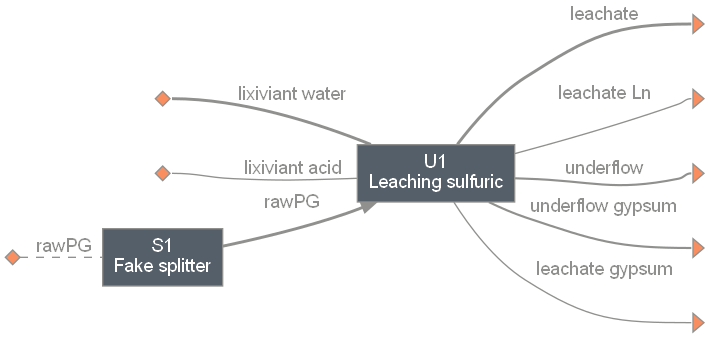

In [44]:
# Create and simulate the system with TEA and LCA

#use qs.Flowsheet to connect LCA impact items to system streams
flowsheet = qs.Flowsheet.flowsheet.default
fs_stream = flowsheet.stream

# Set up the unit
U1 = LeachingSulfuric(ins=('rawPG', fs_stream.lixiviant_water, fs_stream.lixiviant_acid), outs=('leachate', 'leachate_Ln', 'underflow', 'underflow_gypsum', 'leachate_gypsum'), feedPG=feedPG, REEinPG=REEinPG)
S1 = qs.sanunits.FakeSplitter(ID='S1', ins=U1.ins[0].copy(new_ID='rawPG'), outs=U1.ins[0]) # Fake Splitter
U1.simulate()

# Set Construction Material cost and impact
default_U1_steel = qs.Construction('steel', item=steel_item, linked_unit=U1, quantity=U1.design_results['Steel'])
U1.construction = default_U1_steel

# Initialize the System
sys = qs.System('sys', path=(S1,U1))

# Calculate LCA and TEA
lca = qs.LCA(system=sys, lifetime=1, lifetime_unit='year', electricity_item=lambda: U1.power_utility.rate*(365*24), heatNG_item=lambda:U1.heat_duty/1000*(365*24))
tea = qs.SimpleTEA(sys, discount_rate=0.15, lifetime=30)

sys.simulate()
sys.diagram()

### Leaching Unit Design Results

In [45]:
U1.results(include_installed_cost=True)

Leaching sulfuric                              Units       U1
Power                    Rate                     kW     5.62
                         Cost                 USD/hr    0.439
Design                   Leaching Efficiency       %     43.1
                         Washing Stages            #     2.75
                         Total Stages              #     3.75
                         Volume                   m3  2.9e+03
                         Settling Area            m2      619
                         Diameter                  m     28.1
                         Height                    m     4.68
                         Thickness                 m   0.0705
                         Steel                    kg 4.71e+05
                         Heat Duty              kJ/h 5.14e+08
Purchase cost            Thickener               USD 1.68e+06
Total purchase cost                              USD 1.68e+06
Installed equipment cost                         USD 5.88e+06
Utility cost                                  USD/hr    0.439
Natural Gas                                   USD/hr 3.88e+03

### Life Cycle Assessment indicator results

In [46]:
lca.show()

LCA: sys (lifetime 1 yr)
Impacts:
                                   Construction  Transportation   Stream   Others    Total
E_Resources_Total (points)             3.43e+05               0 4.26e+07 1.86e+07 6.16e+07
E_EcosystemQuality_Total (points)      1.66e+05               0 4.24e+07 1.05e+07 5.31e+07
I_HumanHealth_Total (points)           1.16e+05               0 2.53e+07  1.1e+07 3.64e+07
H_HumanHealth_Total (points)           1.42e+05               0 5.45e+07 1.15e+07 6.61e+07
E_HumanHealth_Total (points)           4.14e+05               0 3.79e+08 1.59e+07 3.95e+08
I_EcosystemQuality_Total (points)         5e+04               0  7.5e+06 7.55e+06 1.51e+07
I_Resources_Total (points)             4.85e+05               0 6.76e+07 1.83e+07 8.64e+07
H_EcosystemQuality_Total (points)       4.9e+04               0 7.84e+06 6.67e+06 1.46e+07
GlobalWarming (kg CO2-Eq)              2.26e+06               0 2.81e+08 3.64e+08 6.47e+08
H_Resources_Total (points)             3.43e+05         

### Contributors to LCA impacts

In [ ]:
constructionImpact = lca.get_impact_table('Construction')
streamImpact = lca.get_impact_table('Stream')
otherImpact = lca.get_impact_table('Other')
print('')
print(constructionImpact.iloc[:,10])
print('')
print(streamImpact.iloc[:,9])
print('')
print(otherImpact.iloc[:,9])
print('')

### Technoeconomic Analysis Results

In [ ]:
c = qs.currency
for attr in ('NPV', 'EAC', 'CAPEX', 'AOC', 'sales', 'net_earnings'):
    uom = c if attr in ('NPV', 'CAPEX') else (c+('/yr'))
    print(f'{attr} is {getattr(tea, attr):,.0f} {uom}')

# Create Model to Describe Uncertainty/Sensitivity

### Define distribution of parameters in the model

In [ ]:
def create_model(sys, fununit):
    model = qs.Model(sys)
    param = model.parameter
    metric = model.metric

    baseline = U1.time
    dist = distributions.Uniform(lower=baseline-105, upper=baseline+85)
    @param(name='Leaching Time', element='U1', kind='coupled', units='mins', baseline=baseline, distribution=dist)
    def set_leachingTime(i):
        U1.time = i

    baseline = U1.temp
    dist = distributions.Uniform(lower=baseline-20, upper=baseline+15)
    @param(name='Leaching Temperature', element='U1', kind='coupled', units='deg C', baseline=baseline, distribution=dist)
    def set_leachingTemp(i):
        U1.temp = i

    baseline = U1.acidConc
    dist = distributions.Uniform(lower=baseline-4, upper=baseline+4.5)
    @param(name='Acid Concentration', element='U1', kind='coupled', units='wt pcnt acid', baseline=baseline, distribution=dist)
    def set_acidConc(i):
        U1.acidConc = i
    
    @metric(name='Equivalent Annual Cost', units=f'USD/kg {fununit}', element='TEA')
    def get_EAC():
        if fununit == 'Ln':
            return sys.TEA.EAC/(fs_stream.leachate_Ln.F_mass*8760)
        elif fununit == 'PG':
            return sys.TEA.EAC/(U1.feedPG*8760)
        else:
            raise NameError(f'For model metric EAC, {fununit} is not "Ln" or "PG"')


    @metric(name='GWP', units=f'kg CO2/kg {fununit}', element='LCA')
    def get_annual_GWP():
        if fununit == 'Ln':
            return sys.LCA.total_impacts['GlobalWarming']/(sys.LCA.lifetime*fs_stream.leachate_Ln.F_mass*8760)
        elif fununit == 'PG':
            return sys.LCA.total_impacts['GlobalWarming']/(sys.LCA.lifetime*U1.feedPG*8760)
        else:
            raise NameError(f'For model metric GwP, {fununit} is not "Ln" or "PG"')

    return model



### Evaluate process system as defined by model

In [ ]:
# Use the commented code below if running more than once. Reset the unit baseline
# U1.time = 120
# U1.temp = 50
# U1.acidConc = 5 

fununit = 'Ln'
model = create_model(sys, fununit) # set system and functional unit

np.random.seed(3221) # setting the seed ensures you get the same sample

samples = model.sample(N=100, rule='L')
model.load_samples(samples)
model.evaluate()

pd.DataFrame(model.table)

# Analyze Results

### Uncertainty shown by box and whisker plot

In [ ]:
fig, ax = qs.stats.plot_uncertainties(model)
fig

### Uncertainty using kernel-density plot

In [ ]:
fig, ax = qs.stats.plot_uncertainties(model, x_axis=model.metrics[0], y_axis=model.metrics[1], kind='kde-kde', center_kws={'fill': True}) #cneter_kws={'color': 'blue'}
ax0, ax1, ax2 = fig.axes # KDE, top box, right box
ax0.set(xlabel=f'Equivalent Annual Cost (USD/kg {fununit})', ylabel=f'Global Warming Potential (kg CO2 eq/kg {fununit})')
fig

### Complete a sensitivity analysis on the model parameters

In [ ]:
r_df, p_df = qs.stats.get_correlations(model, kind='Spearman')
display(pd.DataFrame(r_df), pd.DataFrame(p_df))

# Filter out parameters that only meet a certain threshold
def filter_parameters(model, df, threshold):
    new_df = pd.concat((df[df>=threshold], df[df<=-threshold]))
    filtered = new_df.dropna(how='all')
    param_dct = {p.name_with_units:p for p in model.get_parameters()}
    parameters = set(param_dct[i[1]] for i in filtered.index)
    return list(parameters)

# Filter out parameters with low row (sensitivity)
model.parameters = key_parameters = \
filter_parameters(model, r_df, threshold=0.01)

fig, ax = qs.stats.plot_correlations(r_df, parameters=key_parameters, metrics=model.metrics, legend='brief') # plot from seaborn.relplot. Use attributes from relplot in plot_correlations() #https://stackoverflow.com/questions/66404883/seaborn-scatterplot-set-hollow-markers-instead-of-filled-markers
fig

### Look at the optimal conditions for the leaching process

In [ ]:
def leaching_conc_temp_GWP(sys, fununit):
    model = create_model(sys, fununit)

    y = np.linspace(25, 70, 50)
    x = np.linspace(0.5, 9.5, num=len(y))
    z = [120]*len(y)
    result = []
    i = 0

    while i < len(y):
        xi = [x[i] for n in range(len(y))]
        samples = pd.DataFrame(columns = ['x', 'y', 'z'])
        samples['x'], samples['y'], samples['z'] = z, y, xi
        model.load_samples(samples.to_numpy())
        model.evaluate()
        result.extend(model.table.iloc[:,4].values.tolist())
        i += 1

    X, Y = np.meshgrid(x, y)
    Z = np.array(result).reshape(len(y),len(y)).T
    
    fig, ax = plt.subplots()
    cp = plt.contourf(X,Y,Z, 20, cmap='inferno_r')
    fig.colorbar(cp, label=f'Global Warming Potential (kg CO2 eq/kg {fununit})')
    ax.set(xlabel='Acid Concentration (wt %)', ylabel='Leaching Temperature (deg C)')
    fig

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
leaching_conc_temp_GWP(sys, fununit)
warnings.resetwarnings()